## Loading Data

---

- kiva_loans.csv

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_files/kiva_loans.csv', parse_dates=['date']) 
df.head(4)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01


## Country Counts

In [5]:
top = df.groupby('country').count()[['id']].sort_values('id', ascending=False).apply(lambda x: x/x.sum(), axis=0).iloc[:20]

In [6]:
list(top.index.values)

['Philippines',
 'Kenya',
 'El Salvador',
 'Cambodia',
 'Pakistan',
 'Peru',
 'Colombia',
 'Uganda',
 'Tajikistan',
 'Ecuador',
 'Paraguay',
 'Nicaragua',
 'India',
 'Vietnam',
 'Nigeria',
 'Bolivia',
 'Lebanon',
 'Armenia',
 'Palestine',
 'Samoa']

In [7]:
top2 = df[df['country'].isin(top.index)]

In [8]:
top2.groupby(['country','sector']).count()['id'].unstack(1)

sector,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale
country,,,,,,,,,,,,,,,
Armenia,4630.0,49.0,263.0,144.0,1293.0,13.0,361.0,748.0,45.0,75.0,162.0,260.0,389.0,184.0,15.0
Bolivia,1257.0,402.0,718.0,186.0,440.0,20.0,2385.0,267.0,429.0,195.0,83.0,1087.0,1021.0,313.0,3.0
Cambodia,10559.0,248.0,41.0,179.0,1390.0,7.0,1187.0,46.0,2109.0,42.0,18241.0,319.0,226.0,235.0,7.0
Colombia,4987.0,474.0,846.0,235.0,807.0,91.0,4723.0,99.0,62.0,374.0,17.0,5183.0,3824.0,230.0,43.0
Ecuador,5300.0,205.0,1484.0,100.0,49.0,8.0,2512.0,60.0,44.0,182.0,28.0,2577.0,825.0,140.0,7.0
El Salvador,14009.0,554.0,1906.0,195.0,111.0,19.0,8316.0,280.0,5977.0,497.0,338.0,5670.0,1637.0,363.0,3.0
India,3416.0,791.0,524.0,131.0,560.0,5.0,1944.0,43.0,1295.0,289.0,315.0,695.0,1053.0,172.0,4.0
Kenya,33644.0,347.0,4753.0,797.0,1329.0,32.0,14072.0,631.0,286.0,295.0,2130.0,10185.0,5460.0,1843.0,21.0
Lebanon,245.0,134.0,652.0,182.0,2608.0,28.0,1165.0,537.0,323.0,121.0,498.0,850.0,1301.0,141.0,7.0


## Gender Count

In [9]:
def get_gender_ratio(gender_string):
    gender_split = str(gender_string).split(', ')
    return gender_split.count('female') *1.0 / len(gender_split)

In [10]:
df['gender_ratio'] = df['borrower_genders'].apply(get_gender_ratio)

In [11]:
def top_sectors(df, country_name):
    result = (
        df.loc[df['country']==country_name, 'sector']
        .value_counts().iloc[:3].index.values
    )
    return list(result)

In [12]:
top_sectors(df, 'Kenya')

['Agriculture', 'Food', 'Retail']

In [13]:
top3 = (
    df.groupby('country')
    .agg({'gender_ratio': np.mean, 'id': np.count_nonzero})
    .sort_values('id', ascending=False)
    .iloc[:20]
    .reset_index()
)
top3['top_sectors'] = top3['country'].apply(lambda x: top_sectors(df, x))

In [14]:
top3

,country,gender_ratio,id,top_sectors
0,Philippines,0.947289,160441,"[Retail, Food, Agriculture]"
1,Kenya,0.741245,75825,"[Agriculture, Food, Retail]"
2,El Salvador,0.587889,39875,"[Agriculture, Food, Housing]"
3,Cambodia,0.830535,34836,"[Personal Use, Agriculture, Housing]"
4,Pakistan,0.961711,26857,"[Services, Retail, Transportation]"
5,Peru,0.626010,22233,"[Agriculture, Food, Retail]"
6,Colombia,0.584587,21995,"[Retail, Agriculture, Food]"
7,Uganda,0.460688,20601,"[Food, Agriculture, Retail]"
8,Tajikistan,0.742075,19580,"[Agriculture, Services, Education]"
9,Ecuador,0.749841,13521,"[Agriculture, Retail, Food]"


In [15]:
retail_use = (
    df.loc[(df['country']=='Philippines') & 
           (df['sector']=='Retail') &
           (df['activity']=='General Store'), 
           'use']
    .iloc[:20]
    .values
)
for val in retail_use:
    print(val)

to buy additional items like eggs, charcoal, rice, Milo, shampoo, groceries, etc. to sell 
to purchase sugar, coffee, coffee creamer, canned goods, cooking oil, breads, and beverages to sell.
to buy goods to sell.
to buy additional groceries to sell
to buy additional stocks for her sari-sari store.
To be used in purchasing additional groceries and other consumable products
to buy more goods to sell in her general store
to purchase more items to sell in her general store
to buy items to sell like sugar, milk, canned goods, eggs, etc.
to buy additional stock like canned goods, shampoo, detergent soap, fabric conditioner, and noodles to sell
to buy more items to sell in her general store.
to restock her store with basic commodities.
to buy dry goods to sell.
to buy candies, soap, canned goods, noodles, toothbrushes, snack foods and breads for her retail store.
to buy more goods to sell and to repair her store.
to purchase additional items to sell
to buy more stocks to sell in her general 

## Gender Ratio Graph

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette('Paired')
sns.set_style('darkgrid')
sns.set_context('talk')

In [67]:
graph = df.groupby('country').mean()[['gender_ratio']].reset_index().sort_values('gender_ratio', ascending=False).iloc[:20]


In [68]:
graph.head()

,country,gender_ratio
0,Afghanistan,1.0
18,Cote D'Ivoire,1.0
83,Virgin Islands,1.0
66,Solomon Islands,1.0
25,Guam,1.0


Text(0.5,1,u'Top 20 Countries')

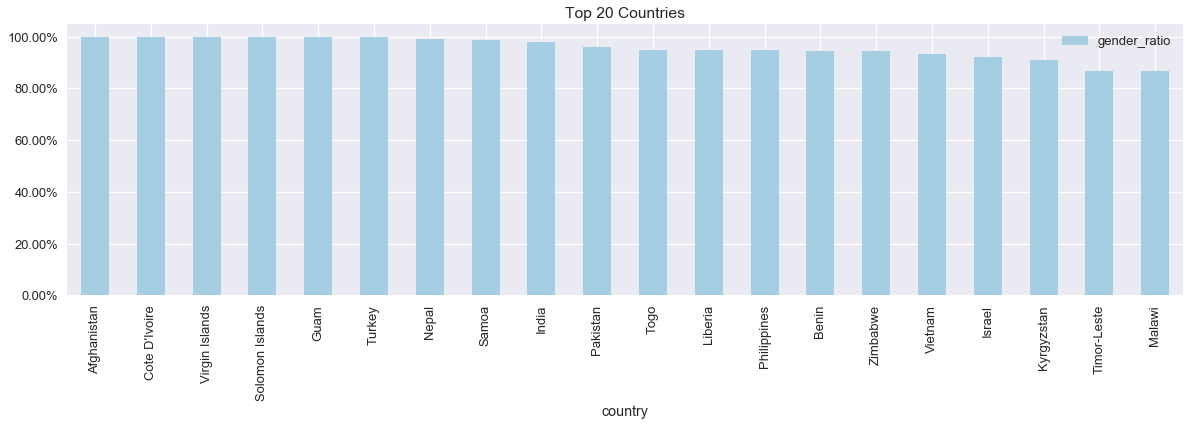

In [82]:
from matplotlib import ticker

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
graph.plot.bar(x='country', y='gender_ratio', ax=ax)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2%}'))
ax.set_title('Top 20 Countries')

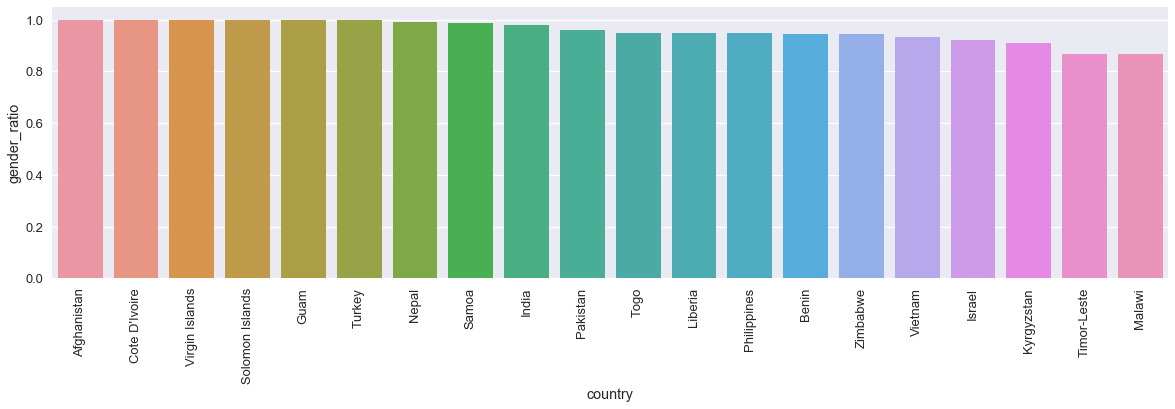

In [95]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x='country', y='gender_ratio', data=graph, ax=ax, ci=0.5)
_ = plt.xticks(rotation=90)

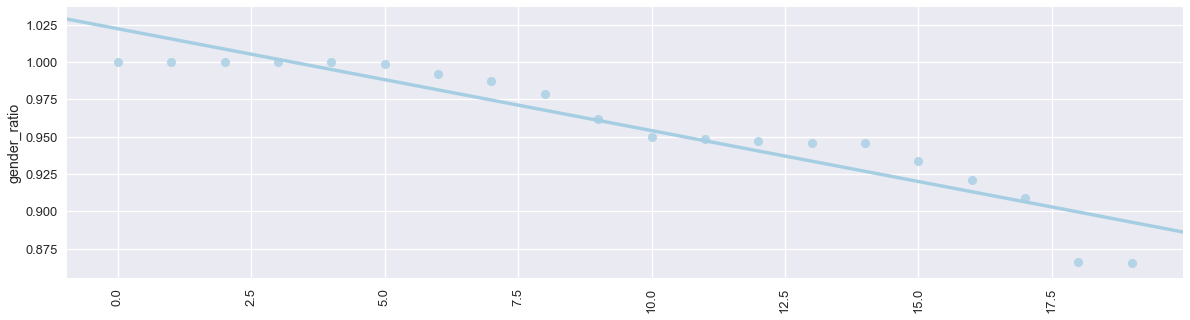

In [96]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.regplot(x=np.arange(0,20,1), y='gender_ratio', data=graph, ax=ax, ci=0.5)
_ = plt.xticks(rotation=90)

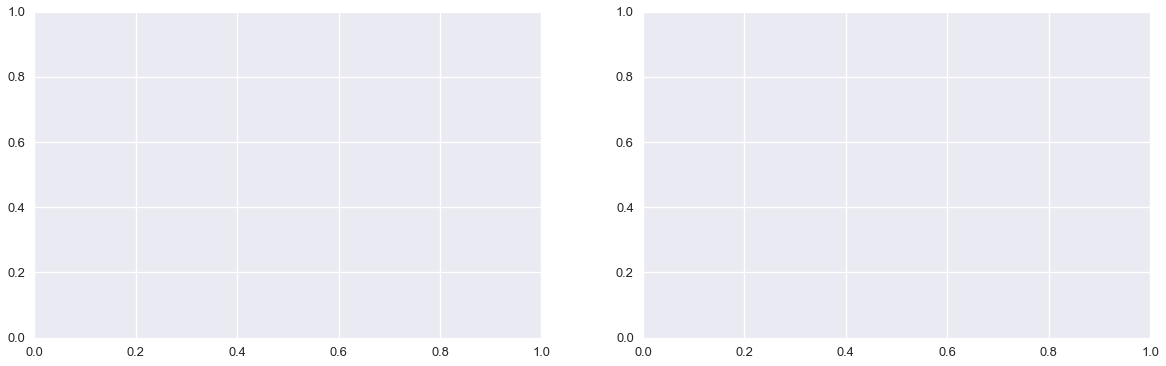

In [60]:
fig